<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
دایی موند
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    به اولین تمرین از فصل‌های مدل‌سازی کالج خوش‌آمدید 😊🎉
    <br>
    هدف ما در این مسئله این است که قیمت الماس‌ها را بر اساس تعدادی از ویژگی‌های آن‌ها پیش‌بینی کنیم.
    برای حل این مسئله به سراغ الگوریتم رگرسیون خطی خواهیم رفت.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [18]:
import numpy as np
import pandas as pd 

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ آموزشی‌ای که در اختیار داریم شامل ۱۰ ستون است که در جدول زیر، توضیحات هر کدام از ستون‌ها آورده شده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>carat</code>|وزن الماس به معیار قیراط|
|<code>cut</code>|کیفیت تراش‌خوردگی الماس|
|<code>color</code>|رنگ الماس از J(بدترین) تا D (بهترین)|
|<code>clarity</code>|معیار شفافیت الماس (از چپ به راست از بدترین به بهترین: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
|<code>x</code>|طول الماس به میلی‌متر|
|<code>y</code>|عرض الماس به میلی‌متر|
|<code>z</code>|عمق الماس به میلی‌متر|
|<code>depth</code>|عمق درصدی که برابر است با z / mean(x,y)|
|<code>table</code>|عرض عریض‌ترین نقطه بالایی الماس|
|<code>price</code>|قیمت الماس|

</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>diamonds_train.csv</code> و نمونه‌های آزمون که باید قیمت آن‌ها را پیش‌بینی کنید در فایل <code>diamonds_test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزشی را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [19]:
train = pd.read_csv('../data/diamonds_train.csv')
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
test = pd.read_csv('../data/diamonds_test.csv') # TO-DO
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59
1,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
2,1.55,Premium,I,VS1,58.2,60.0,7.69,7.59,4.45
3,0.46,Good,F,IF,56.2,61.0,5.16,5.24,2.92
4,1.10,Very Good,F,VS2,60.6,58.0,6.67,6.77,4.07


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [21]:
# check NaN values exist
train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [22]:
# label categorical columns:
color_map = {color: i + 1 for i, color in enumerate(sorted(set(train['color']), reverse = True))}
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

train['color'] = train['color'].map(color_map)
train['cut'] = train['cut'].map(cut_map)
train['clarity'] = train['clarity'].map(clarity_map)

test['color'] = test['color'].map(color_map)
test['cut'] = test['cut'].map(cut_map)
test['clarity'] = test['clarity'].map(clarity_map)


<AxesSubplot: xlabel='price'>

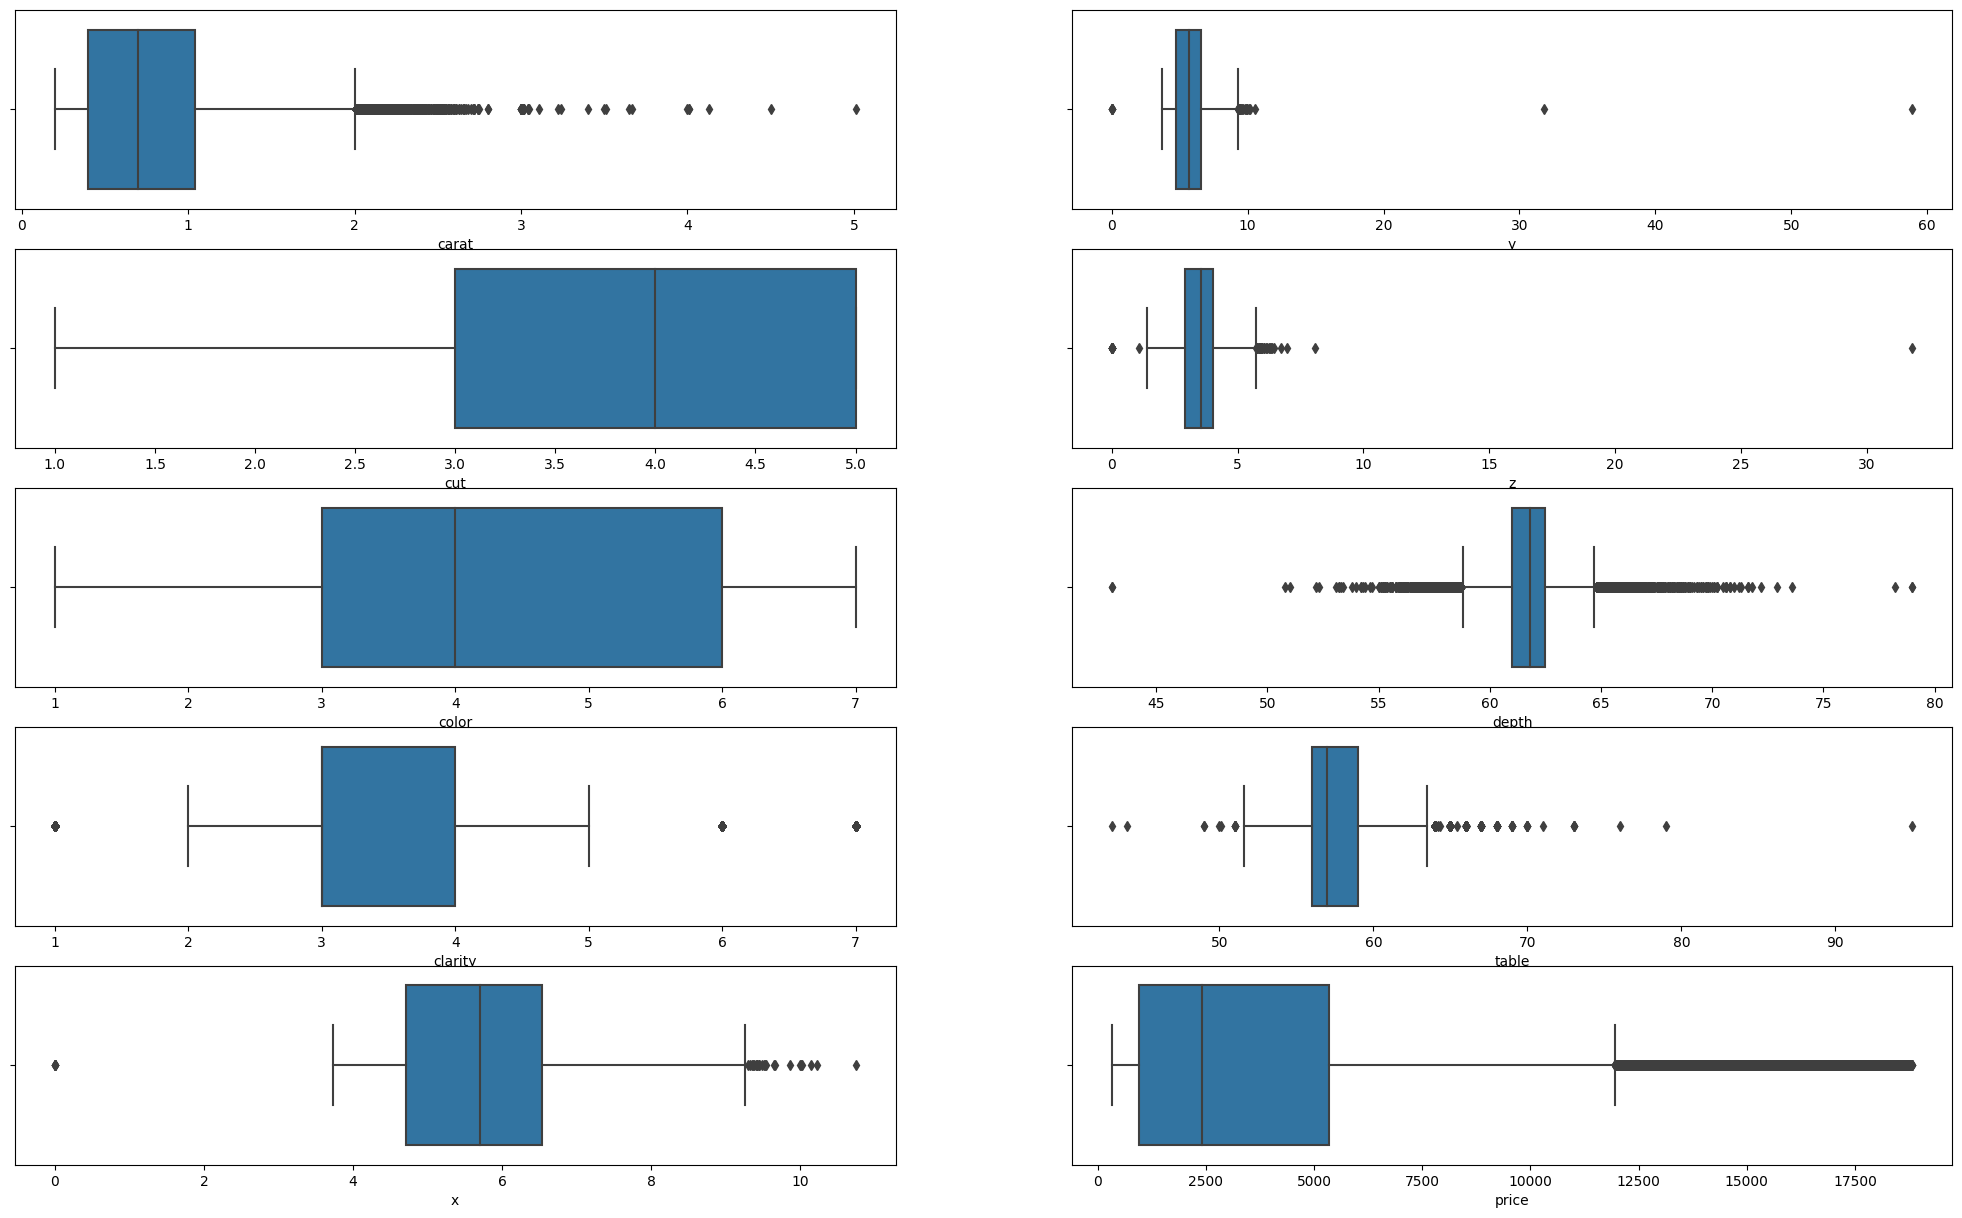

In [23]:
# check for outliers
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 2, figsize=(25, 15))

sns.boxplot(x=train['carat'], ax = ax[0,0])
sns.boxplot(x=train['cut'], ax = ax[1,0])
sns.boxplot(x=train['color'], ax = ax[2,0])
sns.boxplot(x=train['clarity'], ax = ax[3,0])
sns.boxplot(x=train['x'], ax = ax[4,0])
sns.boxplot(x=train['y'], ax = ax[0,1])
sns.boxplot(x=train['z'], ax = ax[1,1])
sns.boxplot(x=train['depth'], ax = ax[2,1])
sns.boxplot(x=train['table'], ax = ax[3,1])
sns.boxplot(x=train['price'], ax = ax[4,1])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده‌ها را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    الگوریتم <code>LinearRegression</code> نیز در کتابخانه‌ی <code>scikit-learn</code> به‌خوبی پیاده‌سازی شده و می‌توانیم از آن جهت اجرای الگوریتم <i>رگرسیون خطی</i> بر روی داده‌های خود کمک بگیریم.
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در سلول پایین با استفاده از کتابخانه <code>scikit-learn</code> مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    <b>حتما باید از مدل رگرسیون خطی یعنی <code>LinearRegression</code> استفاده کنید.</b>
</font>
</p>

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = train.drop(['price'], axis = 1)
y_train = train['price']

model.fit(X_train, y_train)

LinearRegression()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

In [27]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_train)

r2_score(train['price'], y_pred)

0.9023763932168188

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>80</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدل‌سازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول زیر آماده کنید.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>price</code>|قیمت پیش‌بینی‌شده برای الماس|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
توجه داشته باشید که:
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium; margin-right:48px">
<font face="vazir" size=3>
    ۱. نام دیتافریم پاسخ شما حتماً باید <code>submission</code> باشد، در غیر این‌صورت سامانه‌ی داوری نمی‌تواند تلاش شما را ارزیابی کند.
    <br>
    ۲. این دیتافریم تنها شامل یک ستون با نام <code>price</code> بوده و شامل ۳۹۴۰ ردیف است.
    <br>
    ۳. ترتیب ردیف‌های دیتافریم باید دقیقاً مطابق با نمونه‌های آزمون باشد. یعنی به‌عنوان مثال اولین ردیف شما باید پیش‌بینی مدل‌تان برای نمونه‌ی آزمون اول باشد.
</font>
</p>

In [30]:
# predict test samples
price_pred_for_test = model.predict(test)

submission = pd.DataFrame(columns = ['price'], data = price_pred_for_test)
submission

,price
0,4092.788937
1,3340.857074
2,10091.582939
3,3235.807901
4,6229.723280
...,...
3935,10328.970519
3936,5230.418558
3937,6669.696112
3938,10500.771937


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
joblib.dump(model, 'model')
file_names = ['diamond.ipynb', 'submission.csv', 'model']
compress(file_names)

<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>راهنمایی</b>
</font>
</h4>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ۱. ستون‌های دسته‌ای (<i>categorical</i>) دیتافریم را می‌توانید <code>labelEncode</code> کنید.
    <br>
    ۲. فراموش نکنید که مراحل پیش‌پردازش خود را بر روی نمونه‌های آزمون نیز اعمال کنید.
</font>
</p>